# Facebook Metrics Analysis

*__Author:__ Tomas Ruan Rollan*
<br>
*__LinkedIn:__ https://www.linkedin.com/in/tomas-ruan/*
<br>
*__Email:__ tomruarol@gmail.com*

We will be working with the UCI’s Facebook metrics data available from the UCI archive. <br>
This is a small data set used in the study of predicting the social media performance metrics such as the number of people who have clicked anywhere on the Facebook post or the number of post ‘likes’. <br>
The first seven features were used as the explanatory variables. <br>
The paper published as part of the study can be accessed here.

<a id="1"></a>
### 1. Imports

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

# For oversampling
from imblearn.over_sampling import SMOTE;
from imblearn.over_sampling import SMOTENC;

# Figures inline and set visualization style
%matplotlib inline
sns.set() #Different type of visualization

# import the necessary modelling algorithms

# Regression
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

# Model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Evaluation metrics
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error, explained_variance_score

# Show multiple statements at once
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Using TensorFlow backend.
/Users/tomasruan/anaconda3/envs/data_science/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/tomasruan/anaconda3/envs/data_science/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/tomasruan/anaconda3/envs/data_science/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.in

<a id="2"></a>
### 2. EDA & Data Cleaning

In [2]:
# We import the data
data = pd.read_csv('data/dataset_facebook.csv', sep = ';')

# We take a look at the dataset to see that data was imported correctly
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [3]:
# Let's check the number of rows and columns of train and test
print('We have {} rows.'.format(data.shape[0]))
print('We have {} columns.'.format(len(data.columns))) 

We have 500 rows.
We have 19 columns.


In [4]:
# We take a first look at the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
Page total likes                                                       500 non-null int64
Type                                                                   500 non-null object
Category                                                               500 non-null int64
Post Month                                                             500 non-null int64
Post Weekday                                                           500 non-null int64
Post Hour                                                              500 non-null int64
Paid                                                                   499 non-null float64
Lifetime Post Total Reach                                              500 non-null int64
Lifetime Post Total Impressions                                        500 non-null int64
Lifetime Engaged Users                                                 500 non-nul

We can see we have some missing values in some of the columns, most of them are a really small number, which shouldn't make a huge difference. We will have a look at them afterwards, let's first check if there are any duplicates:

<a id="2.1"></a>
###### 2.1. Duplicate Check

In [5]:
# We check if we have duplicates
data.duplicated().any()

False

It looks like there are no duplicates on the dataset, one problem less!

<a id="2.2"></a>
###### 2.2. Null / NaN Handling

In [6]:
# Let's check missing values
print(data.isnull().sum())

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

Let's first take care of the missing values in the `Paid` column. <br>
The values it can take are 1.0 and 0.0 and only 1 value is missing, let's see which one is the dominant class and by how much and we will decide to input it with that value or not.

0.0    360
1.0    139
Name: Paid, dtype: int64


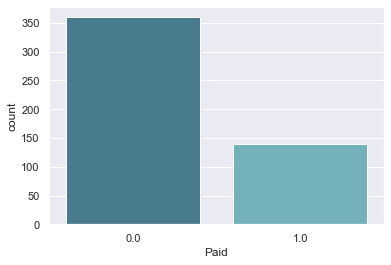

In [7]:
print(data['Paid'].value_counts())
sns.countplot(x = 'Paid', data = data, palette="GnBu_d");

As we can see the number of instances with a `Paid` value equal to 1.0 is way smaller than the ones with a value of 0.0. Let's input that missing value with the dominant value of the feature.

In [8]:
# We input the missing values of the Paid column as 0.0
data.Paid = data.Paid.fillna(0.0)

In the `like` column, values take a numerical value in a huge range. It is only 1 value missing also, which makes it easy to input the missing value with the mean, but taking into account we do not input decimals as we want the 

In [9]:
# We input the missing values of the like column as the mean
data.like = data.like.fillna(round(data.like.mean()))

With the `share` column happens the same as with the `like` column, hence we will do the same as we did before an input those missing values with the mean, but also without the decimal part.

In [10]:
# We input the missing values of the share column as the mean
data.share = data.like.fillna(round(data.share.mean()))

In [11]:
print(data.isnull().sum())

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   0
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

<a id="2.3"></a>
###### 2.3. Data Insights

Let's take a deeper look at our data in order to get some insights and answer several questions.

#### Posts Distribution

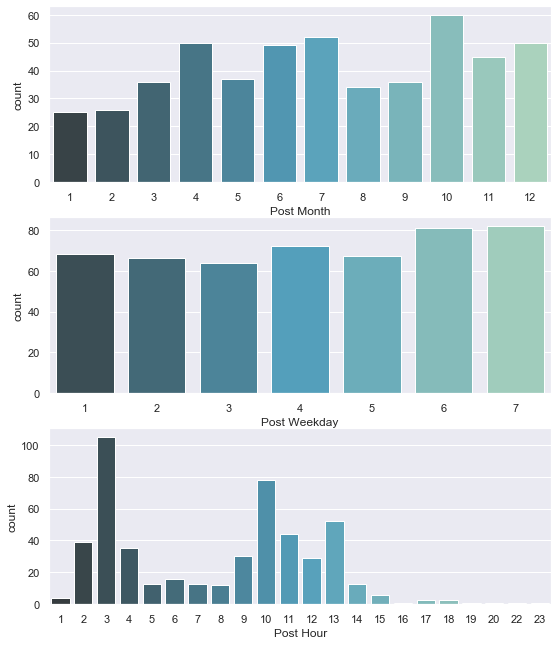

In [12]:
fig, axes =plt.subplots(3,1)
fig.set_size_inches(9,11)

sns.countplot(data['Post Month'], ax=axes[0], palette="GnBu_d");
sns.countplot(data['Post Weekday'], ax=axes[1], palette="GnBu_d");
sns.countplot(data['Post Hour'], ax=axes[2], palette="GnBu_d");

##### Most Common type of post

Photo     426
Status     45
Link       22
Video       7
Name: Type, dtype: int64


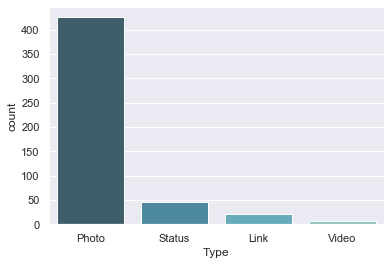

In [13]:
# Let's take a look of the types of posts
print(data['Type'].value_counts())
sns.countplot(x = 'Type', data = data, palette="GnBu_d");

As we can see the most common type of post are photos (`Photo`) with a huge difference over the other types of posts.

#### On average, which type of post received most `Page total likes`?

In [14]:
# Let's get the average of Page Total Likes per Type of Post
data.groupby('Type')['Page total likes'].mean()

Type
Link      116363.181818
Photo     122354.171362
Status    132647.044444
Video     135014.857143
Name: Page total likes, dtype: float64

We can observe how, on average, `Video` posts type received more likes than the rest of post types, followed very closely by the `Status` types.

#### Does this agree with the post `like` metric?

In [15]:
# Let's get the average of likes per Type of Post
data.groupby('Type')['like'].mean()

Type
Link       73.318182
Photo     182.600939
Status    176.711111
Video     231.428571
Name: like, dtype: float64

Taking into account this numbers and the ones shown above them, we can confirm that the previous asumption tends to agre with the like metric. `Video` post types are still the most liked ones, but `Photo` ones ar ethe next ones very close to the `Status` ones.

#### On average, do paid video posts (`Paid`=1) receive more shares than the unpaid ones?

In [16]:
# Let's get the average of shares per paid video posts
data.groupby('Paid')['share'].mean()

Paid
0.0    155.728532
1.0    235.647482
Name: share, dtype: float64

In [17]:
unpaid_percen_shared = round((data.groupby('Paid')['share'].mean()[0] / data.groupby('Paid')['share'].mean().sum())*100)
paid_percen_shared = round((data.groupby('Paid')['share'].mean()[1] / data.groupby('Paid')['share'].mean().sum())*100)

In [18]:
print('Paid video posts (Paid=1) received more shares than unpaid ones.')
print('Unpaid videos got a {}% of shares, while paid ones a {}% aproximately (numbers rounded).'.format(unpaid_percen_shared, paid_percen_shared))

Paid video posts (Paid=1) received more shares than unpaid ones.
Unpaid videos got a 40.0% of shares, while paid ones a 60.0% aproximately (numbers rounded).


Taking into account that:

- `Lifetime Post Consumers` is the number of people who clicked anywhere in a post.
- `Lifetime Post Consumptions` is the number of clicks anywhere in a post. 

#### For each post, let's approximate the 'consumption per user' and determine the post type and month that, on average, receive the most 'consumptions per user'.

In [19]:
data['Consumption Per User'] = data['Lifetime Post Consumptions'] / data['Lifetime Post Consumers']

In [20]:
# Let's get the average of Consumption Per User by month and type
data.groupby('Type')['Consumption Per User'].mean()

Type
Link      1.305035
Photo     1.848347
Status    1.435989
Video     1.534767
Name: Consumption Per User, dtype: float64

`Photo` post types seem to be on average the ones which received the most 'consumption per user'.

In [21]:
# Let's get the average of Consumption Per User by month and type
data.groupby('Post Month')['Consumption Per User'].mean()

Post Month
1     1.336479
2     1.380829
3     3.497949
4     1.504329
5     1.564941
6     2.283264
7     1.824448
8     1.528448
9     1.428994
10    1.721919
11    1.710590
12    1.453134
Name: Consumption Per User, dtype: float64

The month with the biggest 'consumptions per user' value on average is March (3rd month) by a big different respect to almost all of the rest of the months, except for June, which has a big average too.

#### Is this result different from the total `Lifetime Post Consumers` by post type and month?

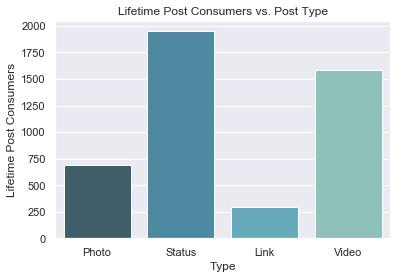

In [22]:
sns.barplot(x='Type',y='Lifetime Post Consumers',data=data,palette='GnBu_d',ci=None);
plt.ylabel("Lifetime Post Consumers");
plt.title("Lifetime Post Consumers vs. Post Type");

In [27]:
# Let's get the average of Lifetime Post Consumers per post type
data.groupby('Type')['Lifetime Post Consumers'].mean()

Type
Link       292.681818
Photo      690.431925
Status    1949.555556
Video     1584.714286
Name: Lifetime Post Consumers, dtype: float64

According to the 'Lifetime Post Consumers' metric, `Status` seem to be the ones with the biggest values, which differs with the assumption made before with the `Consumption Per User` metric.

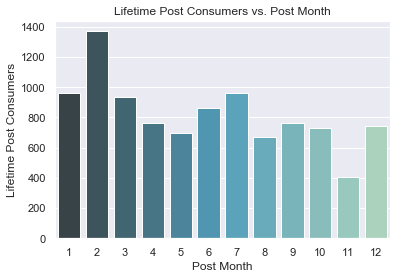

In [24]:
sns.barplot(x='Post Month',y='Lifetime Post Consumers',data=data,palette='GnBu_d',ci=None);
plt.ylabel("Lifetime Post Consumers");
plt.title("Lifetime Post Consumers vs. Post Month");

In [25]:
# Let's get the average of Lifetime Post Consumers per post type
data.groupby('Post Month')['Lifetime Post Consumers'].mean()

Post Month
1      965.360000
2     1371.192308
3      937.194444
4      764.740000
5      697.189189
6      865.897959
7      961.346154
8      670.058824
9      765.166667
10     727.683333
11     406.577778
12     742.500000
Name: Lifetime Post Consumers, dtype: float64

Talking about the `Life Post Consumers` by month, it looks like it also slightly differs from the previous metric, as February (2nd month) looks like the one with the biggest value, followed by July.

In general both assumptions differ from the `Consumption per User` metric, but the data seem to follow more or less the same trend in the case of the months relationship, however a deeper analysis should be done to build a more strong criteria to support this argument.

#### Let's find the month that shows, for the ‘Photo’ type posts, the greatest absolute skew in the distribution of the ‘consumptions per user’. 

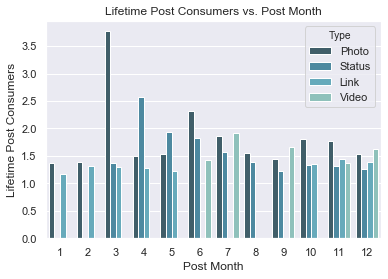

In [26]:
sns.barplot(x='Post Month',y='Consumption Per User', hue='Type' ,data=data,palette='GnBu_d',ci=None);
plt.ylabel("Lifetime Post Consumers");
plt.title("Lifetime Post Consumers vs. Post Month");

From what we can observe in the plot, the month of June (6) is the one with the greatest absolute skew in the `consumer per user` distribution.

<a id="5"></a>
### 3. Correlation Check

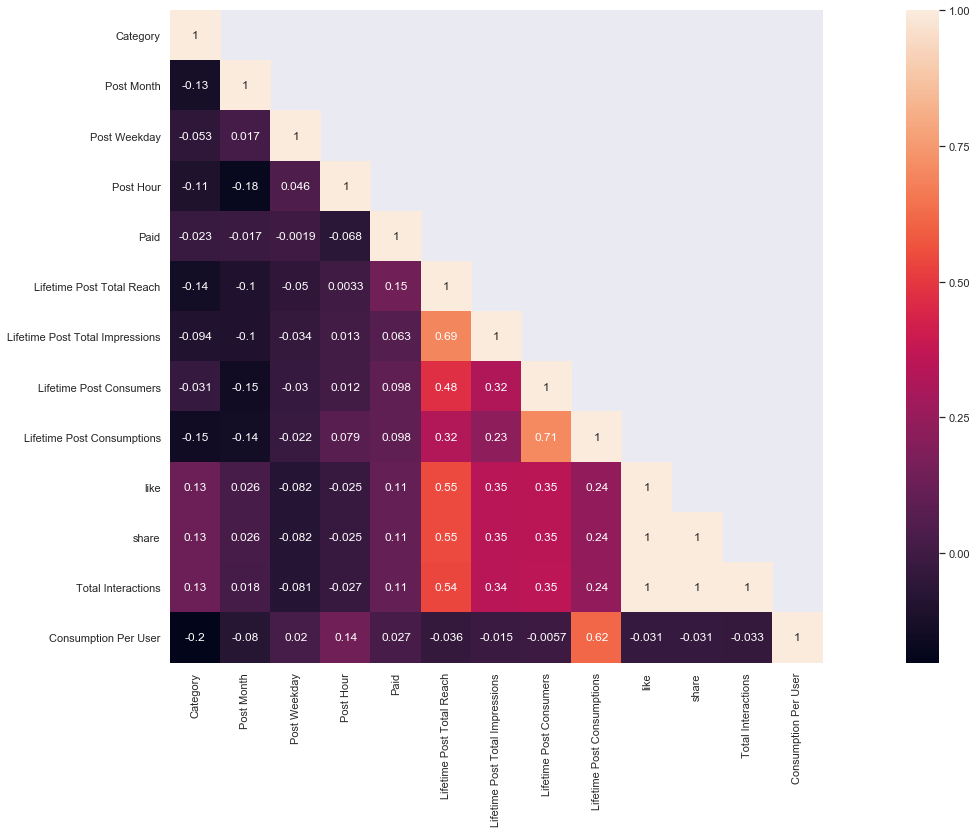

In [30]:
# Correlation Matrix
cor_mat= data.corr()

mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False

fig=plt.gcf()
fig.set_size_inches(30,12)

sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True);

Let's drop those correlated features:

In [29]:
data = data.drop(['comment', 'Lifetime Post Impressions by people who have liked your Page',
                 'Lifetime People who have liked your Page and engaged with your post',
                 'Lifetime Post reach by people who like your Page', 'Page total likes',
                 'Lifetime Engaged Users'], axis=1)

<a id="4"></a>
### 4. Label Encoding / One Hot Encoding

We have many categorical features in the dataset as for example: `Paid` has values like `1.0` or `0.0`,  `Type`, etc. <br>
We need to label this data in order to assign a number to each category, this is converting our categorical data into numerical data so our model can handle it.

In [31]:
data.dtypes

Type                                object
Category                             int64
Post Month                           int64
Post Weekday                         int64
Post Hour                            int64
Paid                               float64
Lifetime Post Total Reach            int64
Lifetime Post Total Impressions      int64
Lifetime Post Consumers              int64
Lifetime Post Consumptions           int64
like                               float64
share                              float64
Total Interactions                   int64
Consumption Per User               float64
dtype: object

In [32]:
# We specify the categorical columns
categorical_cols = ['Type','Category','Post Month','Post Weekday','Post Hour','Paid']

In [33]:
# We define a function to perform the label encoding
def dummies_encoding_columns(df, columns):
    try:
        df = pd.get_dummies(data=df, columns=column)
    except:
        print(column)

In [34]:
# We perform label encoding in the categorical features
data = pd.get_dummies(data=data, columns=['Type','Category','Post Month','Post Weekday','Post Hour','Paid'])